# Introduction to Network Analysis Using Python's Networkx Library
**Author**: <a href='https://www.gesis.org/person/haiko.lietz'>Haiko Lietz</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 13 July 2018

**Description**: This is an introduction to network analysis in Python using version 2.1 of the <a href='https://networkx.github.io/'>networkx</a> library. <font face='Courier'>networkx</font> is not suited for large networks, but it's part of the standard Anaconda installation and therefore easy to install, it's frequently extended and has a large user community. For large networks, consider <a href='https://graph-tool.skewed.de/'>graph-tool</a> or <a href='http://igraph.org/python/'>igraph</a>. Consult <a href='https://doi.org/10.1177/2059799115622763'>this paper</a> for a comparison of these packages and why Python is good for scientific computing. If you're looking for another introduction into <font face='Courier'>networkx</font>, try the <a href='https://networkx.github.io/documentation/stable/tutorial.html'>official tutorial</a>.
## Imports and Settings

In [1]:
%matplotlib inline

In [2]:
import warnings
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import powerlaw as pl
import numpy as np
from networkx.algorithms import bipartite

In [3]:
warnings.filterwarnings('ignore')

## Graph Construction
Terminology: Graphs consist of nodes (entities like persons or hashtags) and edges that connect nodes. By definition, an edge is defined by a pair of nodes. Both nodes and edges can have properties, and we will be using size and color for nodes and width and color for edges. If edges are directed, the graph is called a <font face='Courier'>DiGraph</font>.

Create an empty graph:

In [4]:
G = nx.Graph()

To create a directed graph:

In [5]:
D = nx.DiGraph()

### Populate Graph Using Labels
Add nodes:

In [6]:
labels = (['Alice', 'Bob', 'Carol'])
G.add_nodes_from(labels)

In [7]:
G.nodes()

NodeView(('Alice', 'Bob', 'Carol'))

Alternatively:

In [8]:
for label in labels:
    G.add_node(label)

In [9]:
G.nodes()

NodeView(('Alice', 'Bob', 'Carol'))

Add edges:

In [10]:
edges_label = [['Alice', 'Bob'], ['Bob', 'Carol'], ['Alice', 'Carol']]
G.add_edges_from(edges_label)

In [11]:
G.edges()

EdgeView([('Alice', 'Bob'), ('Alice', 'Carol'), ('Bob', 'Carol')])

Alternatively:

In [12]:
for edge in range(0, len(edges_label)):
    G.add_edge(edges_label[edge][0], edges_label[edge][1])

In [13]:
G.edges()

EdgeView([('Alice', 'Bob'), ('Alice', 'Carol'), ('Bob', 'Carol')])

Obtain graph with integer labels:

In [14]:
H = nx.convert_node_labels_to_integers(G)

In [15]:
H.nodes()

NodeView((0, 1, 2))

In [16]:
H.edges()

EdgeView([(0, 1), (0, 2), (1, 2)])

### Populate Graph Using Integers

In [17]:
G = nx.Graph()

In [18]:
nodes = ([0, 1, 2])
G.add_nodes_from(nodes)

In [19]:
G.nodes()

NodeView((0, 1, 2))

In [20]:
edges = [[0, 1], [0, 2], [1, 2]]
G.add_edges_from(edges)

In [21]:
G.edges()

EdgeView([(0, 1), (0, 2), (1, 2)])

Add labels to nodes:

In [22]:
for i in range(0, len(labels)):
    G.nodes[i]['label'] = labels[i]

To see attributes like labels, set <font face='Courier'>data=True</font>:

In [23]:
G.nodes(data=True)

NodeDataView({0: {'label': 'Alice'}, 1: {'label': 'Bob'}, 2: {'label': 'Carol'}})

In [24]:
G.edges(data=True)

EdgeDataView([(0, 1, {}), (0, 2, {}), (1, 2, {})])

Get neighbors of selected nodes:

In [25]:
[n for n in G.neighbors(0)]

[1, 2]

## Plot Graph
Using a circular layout:

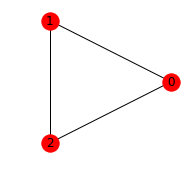

In [26]:
plt.figure(figsize=(2, 2))
nx.draw_circular(G, with_labels=True)

Using the Fruchterman-Reingold spring embedder:

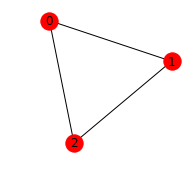

In [27]:
plt.figure(figsize=(2, 2))
nx.draw_spring(G, with_labels=True)

Create and plot directed graph:

In [28]:
D = nx.DiGraph()
D.add_edges_from(edges)

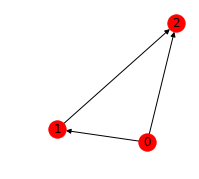

In [29]:
plt.figure(figsize=(2, 2))
nx.draw_spring(D, with_labels=True)

## Bipartite Networks
Bipartite networks consist of two types of nodes -- like agents being influenced by social facts --, and there are no edges among nodes of the same type.

![bipartite](img/bipartite.png)

Load and visualize bipartite data:

In [30]:
edgelist = pd.read_csv('data/bipartite.txt', header='infer', delimiter='\t', encoding='utf-8')
edgelist

,agent,fact
0,a1,f1
1,a1,f2
2,a1,f3
3,a1,f4
4,a1,f5
5,a2,f3
6,a2,f4
7,a2,f5
8,a2,f6
9,a3,f5


Use edgelist to create graph -- note that we can't use the dataframe but have to transform it into an array:

In [31]:
G = nx.Graph()
G.add_edges_from(edgelist.values)

Manually set node positions:

In [32]:
pos_bipartite = {'a1': np.array([-0.33333333,  0.66666667]),
 'a2': np.array([-0.33333333,  0.33333333]),
 'a3': np.array([-0.33333333,  0.        ]),
 'a4': np.array([-0.33333333, -0.33333333]),
 'a5': np.array([-0.33333333, -0.66666667]),
 'f1': np.array([ 0.33333333,  0.80000000]),
 'f2': np.array([ 0.33333333,  0.60000000]),
 'f3': np.array([ 0.33333333,  0.40000000]),
 'f4': np.array([ 0.33333333,  0.20000000]),
 'f5': np.array([ 0.33333333,  0.        ]),
 'f6': np.array([ 0.33333333, -0.20000000]),
 'f7': np.array([ 0.33333333, -0.40000000]),
 'f8': np.array([ 0.33333333, -0.60000000]),
 'f9': np.array([ 0.33333333, -0.80000000])}

In [33]:
G.nodes()

NodeView(('a1', 'f1', 'f2', 'f3', 'f4', 'f5', 'a2', 'f6', 'a3', 'f7', 'a4', 'f8', 'a5', 'f9'))

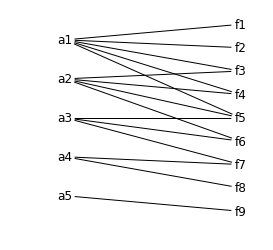

In [34]:
plt.figure(figsize = (3, 3))
nx.draw(G, pos=pos_bipartite, with_labels=True, node_color='w')

Bipartite networks can be folded into unipartite networks. To do that, the two node sets of the bipartite matrix must be "colored", *i.e.* the two partitions must be identified:

In [35]:
#agents, facts = bipartite.sets(G)

The <font face='Courier'>sets()</font> function called in the previous cell can be used to identify the two node sets if the graph is connected.

In [36]:
nx.is_connected(G)

False

Create sets manually:

In [37]:
agents, facts = set(edgelist['agent']), set(edgelist['fact'])

In [38]:
agents, facts

({'a1', 'a2', 'a3', 'a4', 'a5'},
 {'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9'})

Create the agent co-fact graph. An edge gives the number of facts a pair of agents is co-influenced by:

In [39]:
G_agents = bipartite.weighted_projected_graph(G, agents)
G_agents.edges(data=True)

EdgeDataView([('a1', 'a2', {'weight': 3}), ('a1', 'a3', {'weight': 1}), ('a2', 'a3', {'weight': 2}), ('a3', 'a4', {'weight': 1})])

Extract edge weights by taking the EdgeView object, looping through the edge/weight tuple, and extracting the weight:

In [40]:
co_facts = [w['weight'] for (u, v, w) in G_agents.edges(data=True)]
co_facts

[3, 1, 2, 1]

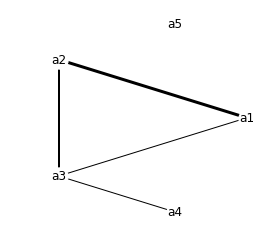

In [41]:
plt.figure(figsize=(3, 3))
nx.draw_circular(G_agents, with_labels=True, node_color='w', width=co_facts)

Create the fact co-agent graph (an edge gives the number of agents that a pair of facts co-influence) and extract edge weights:

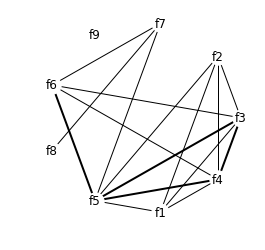

In [42]:
G_facts = bipartite.weighted_projected_graph(G, facts)
co_agents = [w['weight'] for (u, v, w) in G_facts.edges(data=True)]
plt.figure(figsize = (3, 3))
nx.draw_circular(G_facts, with_labels=True, node_color='w', width=co_agents)

### Duality of Groups and Link Communities
Here, we will see how groups in the agent graph correspond to <a href='https://doi.org/10.1038/nature09182'>link communities</a> in the fact graph. Assume that a1 and a2 are in group 0; a3, a4, and a5 are in group 1 in the agent network. In practice, such a partition would likely stem from a clustering algorithm.

In [43]:
agents_groups = pd.read_csv('data/bipartite_agents_groups.txt', header='infer', delimiter='\t', encoding='utf-8')
agents_groups

,agent,group
0,a1,0
1,a2,0
2,a3,1
3,a4,1
4,a5,1


Create a set of agents for each group:

In [44]:
agents_group0 = set(agents_groups[agents_groups['group'] == 0]['agent'])
agents_group1 = set(agents_groups[agents_groups['group'] == 1]['agent'])
agents_group0, agents_group1

({'a1', 'a2'}, {'a3', 'a4', 'a5'})

Transform dataframe into dictionary:

In [45]:
agents_groups_dict = agents_groups.set_index('agent')['group'].to_dict()
agents_groups_dict

{'a1': 0, 'a2': 0, 'a3': 1, 'a4': 1, 'a5': 1}

Add colors to nodes by iterating through the dictionary:

In [46]:
G_agents.nodes(data=True)

NodeDataView({'a1': {}, 'a5': {}, 'a2': {}, 'a3': {}, 'a4': {}})

In [47]:
for key, value in agents_groups_dict.items():
    if value == 0:
        G_agents.nodes[key]['color'] = 'r'
    if value == 1:
        G_agents.nodes[key]['color'] = 'b'

In [48]:
G_agents.nodes(data=True)

NodeDataView({'a1': {'color': 'r'}, 'a5': {'color': 'b'}, 'a2': {'color': 'r'}, 'a3': {'color': 'b'}, 'a4': {'color': 'b'}})

Store colors in a list:

In [49]:
agents_color = [c['color'] for (u, c) in G_agents.nodes(data=True)]
agents_color

['r', 'b', 'r', 'b', 'b']

Plot agent graph with colored nodes:

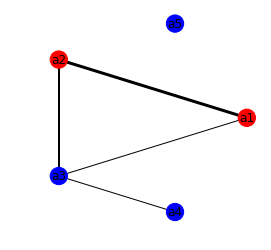

In [50]:
plt.figure(figsize = (3, 3))
nx.draw_circular(G_agents, with_labels=True, node_color=agents_color, width=co_facts)

Using this information, we can construct a graph of facts where now the edges are colored, indicating the co-influence of facts in a group. The way to go is to create one graph for each group and then use the edges of those layers to populate a multigraph.

First, extract an edgelist for each group:

In [51]:
edgelist_group0 = edgelist[edgelist['agent'].isin(agents_group0)]
edgelist_group1 = edgelist[edgelist['agent'].isin(agents_group1)]
edgelist_group0, edgelist_group1

(  agent fact
 0    a1   f1
 1    a1   f2
 2    a1   f3
 3    a1   f4
 4    a1   f5
 5    a2   f3
 6    a2   f4
 7    a2   f5
 8    a2   f6,    agent fact
 9     a3   f5
 10    a3   f6
 11    a3   f7
 12    a4   f7
 13    a4   f8
 14    a5   f9)

Second, create a bipartite graph for each group:

In [52]:
G_group0 = nx.Graph()
G_group0.add_edges_from(edgelist_group0.values)
G_group1 = nx.Graph()
G_group1.add_edges_from(edgelist_group1.values)

Third, create a set of facts for each group -- note the node and edge overlap:

In [53]:
facts_group0, facts_group1 = set(edgelist_group0['fact']), set(edgelist_group1['fact'])
facts_group0, facts_group1

({'f1', 'f2', 'f3', 'f4', 'f5', 'f6'}, {'f5', 'f6', 'f7', 'f8', 'f9'})

Fourth, fold each biartite graph into a fact co-agent graph:

In [54]:
G_facts_group0 = bipartite.weighted_projected_graph(G_group0, facts_group0)
G_facts_group1 = bipartite.weighted_projected_graph(G_group1, facts_group1)

Fifth, extract edge weights:

In [55]:
co_agents_group0 = [w['weight'] for (u, v, w) in G_facts_group0.edges(data=True)]
co_agents_group1 = [w['weight'] for (u, v, w) in G_facts_group1.edges(data=True)]
co_agents_group0, co_agents_group1

([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1], [1, 1, 1, 1])

Sixth, create a multigraph (where there can be multiple edges among the same node pair) and populate it using the edges from the two group layers:

In [56]:
G_facts_groups = nx.MultiGraph()
G_facts_groups.add_nodes_from(G_facts.nodes())
G_facts_groups.add_edges_from(G_facts_group0.edges(data=True), color='r')
G_facts_groups.add_edges_from(G_facts_group1.edges(data=True), color='b')
G_facts_groups.edges(data=True)

MultiEdgeDataView([('f3', 'f2', {'color': 'r', 'weight': 1}), ('f3', 'f6', {'color': 'r', 'weight': 1}), ('f3', 'f5', {'color': 'r', 'weight': 2}), ('f3', 'f1', {'color': 'r', 'weight': 1}), ('f3', 'f4', {'color': 'r', 'weight': 2}), ('f2', 'f5', {'color': 'r', 'weight': 1}), ('f2', 'f1', {'color': 'r', 'weight': 1}), ('f2', 'f4', {'color': 'r', 'weight': 1}), ('f7', 'f5', {'color': 'b', 'weight': 1}), ('f7', 'f8', {'color': 'b', 'weight': 1}), ('f7', 'f6', {'color': 'b', 'weight': 1}), ('f6', 'f5', {'color': 'r', 'weight': 1}), ('f6', 'f5', {'color': 'b', 'weight': 1}), ('f6', 'f4', {'color': 'r', 'weight': 1}), ('f5', 'f1', {'color': 'r', 'weight': 1}), ('f5', 'f4', {'color': 'r', 'weight': 2}), ('f1', 'f4', {'color': 'r', 'weight': 1})])

Seventh, extract colors and edge weights for the multigraph. Nodes are not colored because they can influence agents in both groups (they are neutral regarding groups):

In [57]:
co_agents_colors = [c['color'] for (u, v, c) in G_facts_groups.edges(data=True)]
co_agents_groups = [w['weight'] for (u, v, w) in G_facts_groups.edges(data=True)]

Finally, plot the multigraph:

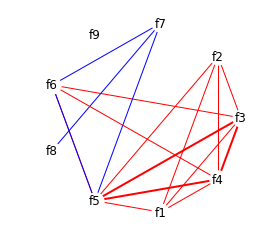

In [58]:
plt.figure(figsize=(3, 3))
nx.draw_circular(G_facts_groups, with_labels=True, node_color='w', edge_color=co_agents_colors, width=co_agents_groups)

Nodes, edges, and labels can also be plotted step by step. This is advantageous if we want to use transparecy solely on the edges:

In [59]:
pos = nx.circular_layout(G_facts_groups)

(-1.0935845150229113,
 1.1538919146177993,
 -1.1417032361922685,
 1.141703275928698)

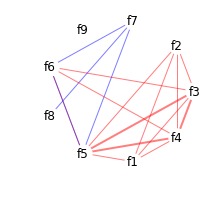

In [60]:
plt.figure(figsize=(3, 3))
nx.draw_networkx_nodes(G_facts_groups, pos=pos, node_color='w')
nx.draw_networkx_labels(G_facts, pos=pos)
nx.draw_networkx_edges(G_facts_groups, pos=pos, edge_color=co_agents_colors, width=co_agents_groups, alpha=0.5)
plt.axis('off')

## Use Case: How Politicians Talk On Twitter (Bundestagswahl 2013)
Now let's work with empirical data: tweets by German politicians before and after the federal election of 2013. A version of this data was analyzed in <a href='https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/viewPaper/8069'>this</a> paper.
### Structure of Network Data
Network data is practically stored as a relational database consisting of entities and their relationships. In this case, there are two types of entities, politicians (agents) and hashtags (facts):

In [61]:
politicians = pd.read_csv('data/icwsm14_politicians.txt', delimiter='\t', encoding='utf-8')
politicians.head()

,agent_id,agent,account_id,account,account_description,party
0,0,Florian Köhler,6712152,Cheatha,"Musik, Fotografie, Mac, Linux, freie Software,...",Piratenpartei
1,1,Alexander Gaus,12870642,alexgaus,NaN,Die Grünen
2,2,Dennis Deutschkämer,14446872,_rony,NaN,Piratenpartei
3,3,Malte Spitz,14618956,maltespitz,Mitglied im Bundesvorstand Bündnis 90/Die Grün...,Die Grünen
4,4,Thorsten Wirth,14857351,insideX,"Humanhedonist, baue gerade am Todesstern und a...",Piratenpartei


In [62]:
hashtags = pd.read_csv('data/icwsm14_hashtags.txt', delimiter='\t', encoding='utf-8')
hashtags.head()

,fact_id,fact
0,0,0globuli
1,1,0mg
2,2,0zapftis
3,3,100000mark
4,4,1000dankefürdieunterstützung


There are three types of relationships, mentioning (of politicians by politicians), retweeting (of politicians by politicians), and tagging (of tweets by politicians). The identifiers of mentioned politicians, retweeted politicians, and used hashtags are stored as facts because they influence agents in their behavior:

In [63]:
edgelist_mentioning = pd.read_csv('data/icwsm14_mentioning.txt', delimiter='\t', encoding='utf-8')
edgelist_mentioning = edgelist_mentioning[edgelist_mentioning['agent_id'] != edgelist_mentioning['fact_id']]
edgelist_mentioning.head()

,time,agent_id,fact_id
0,2013-07-20 00:14:05,336,537
1,2013-07-20 00:14:05,467,537
2,2013-07-20 00:47:29,18,485
3,2013-07-20 02:21:24,805,146
4,2013-07-20 05:16:45,740,108


In [64]:
edgelist_retweeting = pd.read_csv('data/icwsm14_retweeting.txt', delimiter='\t', encoding='utf-8')
edgelist_retweeting = edgelist_retweeting[edgelist_retweeting['agent_id'] != edgelist_retweeting['fact_id']]
edgelist_retweeting.head()

,time,agent_id,fact_id
0,2013-07-20 00:47:29,885,43
1,2013-07-20 05:16:45,45,18
2,2013-07-20 05:50:02,700,18
3,2013-07-20 05:54:07,700,18
4,2013-07-20 05:56:07,700,18


In [65]:
edgelist_tagging = pd.read_csv('data/icwsm14_tagging.txt', delimiter='\t', encoding='utf-8')
edgelist_tagging.head()

,time,agent_id,fact_id
0,2013-07-20 00:01:00,672,13911
1,2013-07-20 00:01:47,672,22760
2,2013-07-20 00:14:05,288,1234
3,2013-07-20 00:14:05,288,15602
4,2013-07-20 00:14:05,288,17479


### Graph Visualization
A good way to start an analysis is to get a visual impression of the data. Let's start with the directed unipartite graph of who mentions who. Tune <font face='Courier'>k</font> (the optimal distance between nodes) until the result looks satisfactory:

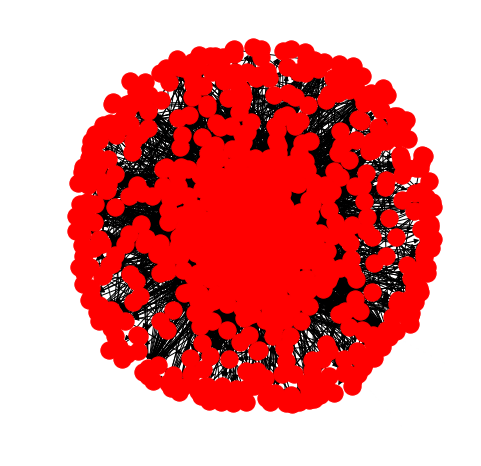

In [66]:
D_mentioning = nx.DiGraph()
D_mentioning.add_edges_from(edgelist_mentioning[['agent_id', 'fact_id']].values)
pos_mentioning = nx.spring_layout(D_mentioning, k=0.5)
plt.figure(figsize=(6, 6))
nx.draw(D_mentioning, pos=pos_mentioning)

Get size of graph:

In [67]:
nx.number_of_nodes(D_mentioning), nx.number_of_edges(D_mentioning)

(731, 8882)

Is the graph weakly connected (it is if it contains a directed path from <font face='Courier'>u</font> to <font face='Courier'>v</font> or a directed path from <font face='Courier'>v</font> to <font face='Courier'>u</font> for every pair of vertices <font face='Courier'>u</font>, <font face='Courier'>v</font>)?

In [68]:
nx.is_weakly_connected(D_mentioning)

False

How many weakly connected components are there?

In [69]:
nx.number_weakly_connected_components(D_mentioning)

3

Extract the largest weakly connected component and plot it:

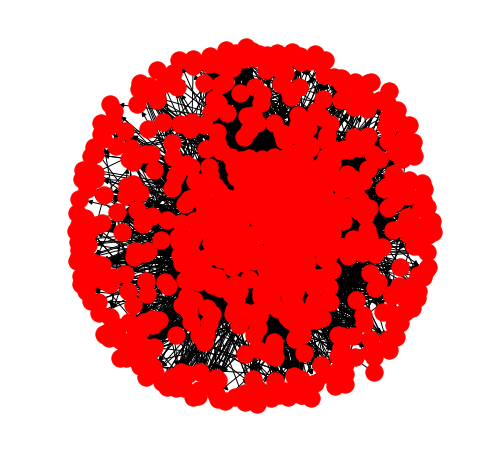

In [70]:
D_mentioning_giant = max(nx.weakly_connected_component_subgraphs(D_mentioning), key=len)
pos_mentioning_giant = nx.spring_layout(D_mentioning, k=0.5)
plt.figure(figsize=(6, 6))
nx.draw(D_mentioning_giant, pos=pos_mentioning_giant)

In [71]:
nx.number_of_nodes(D_mentioning_giant), nx.number_of_edges(D_mentioning_giant)

(727, 8880)

We can do better than this!

First, since we've used a simple <font face='Courier'>nx.DiGraph()</font> structure edge weights are neglected. The <font face='Courier'>add_edges_from()</font> function doesn't create edge weights automatically but overwrites a node pair if it occurs again. We can include weights by grouping the initial dataframe on source and target nodes:

In [72]:
edgelist_mentioning_weighted = edgelist_mentioning.groupby(['agent_id', 'fact_id']).size().to_frame('weight').reset_index()
edgelist_mentioning_weighted.head()

,agent_id,fact_id,weight
0,0,4,1
1,0,6,1
2,0,18,1
3,0,27,1
4,0,43,1


Now use the <font face='Courier'>add_weighted_edges_from()</font> function:

In [73]:
D_mentioning = nx.DiGraph()
D_mentioning.add_weighted_edges_from(edgelist_mentioning_weighted.values)

In [74]:
mentioning_weight = [w['weight'] for (u, v, w) in D_mentioning.edges(data=True)]
mentioning_weight = [w/20 for w in mentioning_weight]

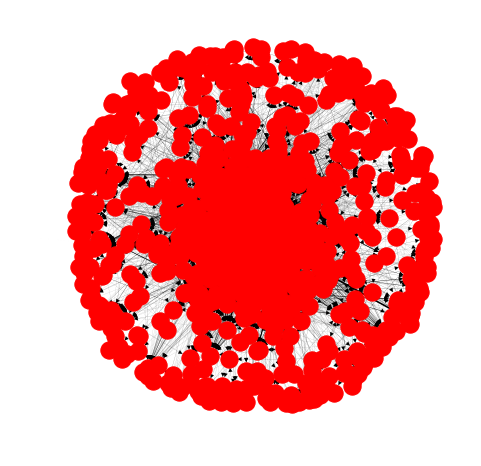

In [75]:
plt.figure(figsize=(6, 6))
nx.draw(D_mentioning, pos=pos_mentioning, width=mentioning_weight)

Second, size nodes by the number of times the corresponding politician has been mentioned:

In [76]:
mentioning_inweight = dict(D_mentioning.in_degree(weight='weight'))

In [77]:
for key, value in mentioning_inweight.items():
    D_mentioning.nodes[key]['inweight'] = value

In [78]:
mentioning_inweight = [w['inweight'] for (u, w) in D_mentioning.nodes(data=True)]

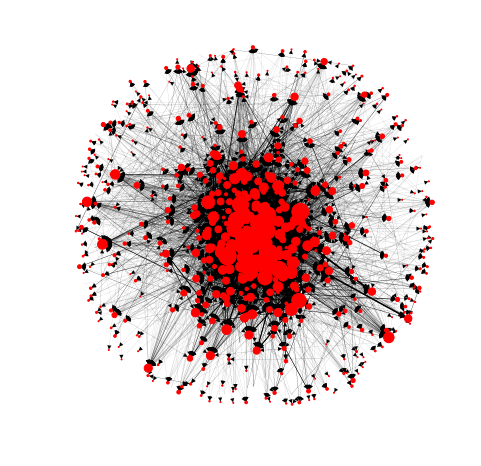

In [79]:
plt.figure(figsize=(6, 6))
nx.draw(D_mentioning, pos=pos_mentioning, node_size=mentioning_inweight, width=mentioning_weight)

Third, each politician belongs to a political party. Represent each by a color. To do so, extract the politicians that are actually contained in the graph:

In [80]:
politicians_parties_mentioning = politicians[politicians['agent_id'].isin(set(D_mentioning.nodes))][['agent_id', 'party']]
politicians_parties_mentioning.head()

,agent_id,party
0,0,Piratenpartei
2,2,Piratenpartei
3,3,Die Grünen
4,4,Piratenpartei
5,5,Piratenpartei


Transform this dataframe into a dictionary, loop through it, and assign a color for a given party <font face='Courier'>value</font>:

In [81]:
politicians_parties_mentioning_dict = politicians_parties_mentioning.set_index('agent_id')['party'].to_dict()

In [82]:
for key, value in politicians_parties_mentioning_dict.items():
    if value == 'CDU':
        D_mentioning.nodes[key]['color'] = 'black'
    if value == 'CSU':
        D_mentioning.nodes[key]['color'] = 'black'
    if value == 'FDP':
        D_mentioning.nodes[key]['color'] = 'yellow'
    if value == 'Die Grünen':
        D_mentioning.nodes[key]['color'] = 'green'
    if value == 'Die Linke':
        D_mentioning.nodes[key]['color'] = 'darkviolet'
    if value == 'Piratenpartei':
        D_mentioning.nodes[key]['color'] = 'orange'
    if value == 'SPD':
        D_mentioning.nodes[key]['color'] = 'red'

In [83]:
politicians_color_mentioning = [c['color'] for (u, c) in D_mentioning.nodes(data=True)]

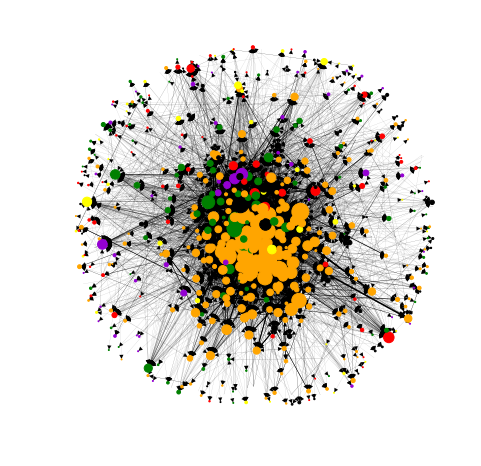

In [84]:
plt.figure(figsize=(6, 6))
nx.draw(D_mentioning, pos=pos_mentioning, node_size=mentioning_inweight, node_color=politicians_color_mentioning, width=mentioning_weight)

Now the graph actually speaks to us!

Graph layouting is a complex process and often takes time to converge to a stable solution. The Fruchterman/Reingold layout algorithm starts with random node positions. Then, the smaller (larger) a node's degree the more it is placed away from (towards) the center of the figure. Non-separation of communities in the center can be a sign of non-convergence. By default, the algorithm uses 50 iterations. Experiment with the <font face='Courier'>iterations</font> parameter:

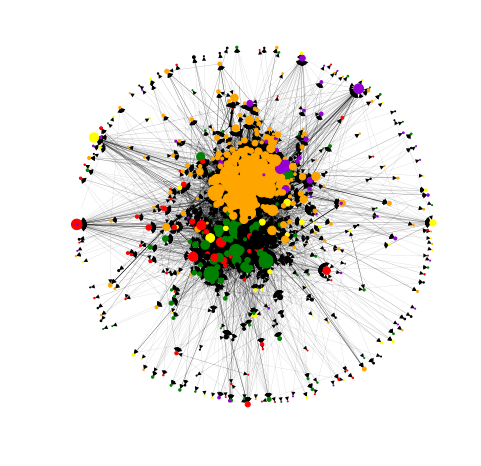

In [85]:
pos_mentioning = nx.spring_layout(D_mentioning, k=1, iterations=200)
plt.figure(figsize=(6, 6))
nx.draw(D_mentioning, pos=pos_mentioning, node_size=mentioning_inweight, node_color=politicians_color_mentioning, width=mentioning_weight)

### Party Mixing Pattern
Eye inspection of the network shows that politicians strongly mention fellow party members. Newman's assortativity measure (defined in <a href='https://doi.org/10.1103/PhysRevE.67.026126'>this paper</a>) can be used to quantify this:

In [86]:
nx.attribute_assortativity_coefficient(D_mentioning, attribute='color')

0.601898263804541

### Distributions
Eye inspection also shows that there are large differences in attention. Who are those highly mentioned politicians? Add real names to nodes and list them along with inweights:

In [87]:
politicians_names = politicians[politicians['agent_id'].isin(set(D_mentioning.nodes))][['agent_id', 'agent']]
politicians_names_dict = politicians_names.set_index('agent_id')['agent'].to_dict()

In [88]:
for key, value in politicians_names_dict.items():
    D_mentioning.nodes[key]['agent'] = value

In [89]:
pd.DataFrame({
    'agent': list(nx.get_node_attributes(D_mentioning, 'agent').values()),
    'inweight': list(nx.get_node_attributes(D_mentioning, 'inweight').values())
}).sort_values(by='inweight', ascending=False)

,agent,inweight
44,Sasa Raber,445
151,Patrick Schiffer,405
3,Markus Barenhoff,316
8,Maja Tiegs,307
5,Marina Weisband,289
51,Volker Beck,273
27,Nadja Baberowski,268
149,Peter Altmaier,263
163,Claudia Frick,257
21,Bruno Kramm,249


We are used to normal distributions. If the degrees $k$ of a graph are normally distributed, the network has a typical scale described by the mean and standard deviation of the normal distribution. <a href='http://doi.org/10.1126/science.286.5439.509'>Scale-free networks</a>, a paradigmatic class of graphs in network science, don't have a typical scale. Instead, its degree distribution resembles a power law:

$p(k)\propto k^{-\alpha}$

Power laws show as straight lines on log-log scales, where the exponent $\alpha$ determines the slope. Networks with exponents $\alpha\leq3$ theoretically have infinite variance. In practice, this means that the standard deviation of a sample may be vary far from the expectation.

Instead of the degree, we can also use the weighted indegree to study if the mentioning network is scale-free:

In [90]:
w = [w for w in mentioning_inweight if w > 0]

Text(0,0.5,'$p(w)$')

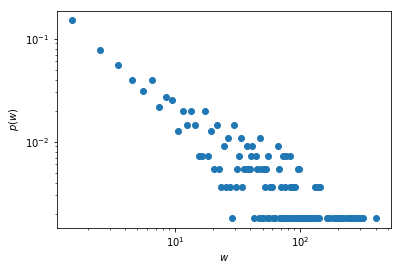

In [91]:
pl.plot_pdf(w, marker='o', ls='', linear_bins=True) # explore setting linear_bins=False
plt.xlabel('$w$')
plt.ylabel('$p(w)$')

There are five candidate functions to describe distributions like this:

- exponential (like the tail of a normal distribution)
- stretched exponential (an exponential with a power-law stretch)
- lognormal
- power law
- truncated power law (a power law with an exponential upper cutoff)

In [92]:
function = ['exponential', 'stretched_exponential', 'lognormal', 'power_law', 'truncated_power_law']

Fit these functions to the data (using maximum likelihood estimation described <a href='https://doi.org/10.1137/070710111'>here</a>). <font face='Courier'>xmin</font> sets a lower cutoff above which the function should describe the data. If <font face='Courier'>xmin=None</font>, the optimal cutoff will be detected.

In [93]:
w_fit = pl.Fit(w, discrete=True, xmin=1)

In [94]:
print('xmin:', w_fit.xmin)
print('alpha:', round(w_fit.alpha, 2))

xmin: 1.0
alpha: 1.32


Print the Kolmogorov-Smirnov goodness of fit:

In [95]:
print('exponential:', round(w_fit.exponential.D, 2))
print('stretched_exponential:', round(w_fit.stretched_exponential.D, 2))
print('lognormal:', round(w_fit.lognormal.D, 2))
print('power_law:', round(w_fit.power_law.D, 2))
print('truncated_power_law:', round(w_fit.truncated_power_law.D, 2))

exponential: 0.23
stretched_exponential: 0.05
lognormal: 0.05
power_law: 0.16
truncated_power_law: 0.04


Add fits to plot:

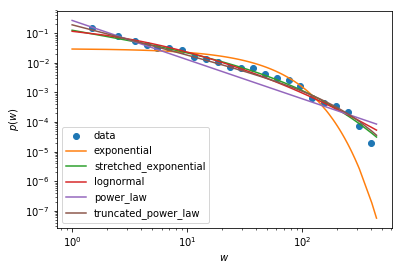

In [96]:
w_fit.plot_pdf(linear_bins=False, marker='o', ls='', label='data')
w_fit.exponential.plot_pdf(label='exponential')
w_fit.stretched_exponential.plot_pdf(label='stretched_exponential')
w_fit.lognormal.plot_pdf(label='lognormal')
w_fit.power_law.plot_pdf(label='power_law')
w_fit.truncated_power_law.plot_pdf(label='truncated_power_law')
plt.xlabel('$w$')
plt.ylabel('$p(w)$')
plt.legend()

Assess which of two functions is a more plausible fit. The first score, $R$, is the loglikelihood ratio between the two functions. It is positive (negative) when the first (second) function is more likely. The second score, $p$, gives the significance of the difference.

In [97]:
w_fit.distribution_compare('power_law', 'stretched_exponential')

(-144.90037614013869, 8.8994081131770585e-28)

In [98]:
w_fit.distribution_compare(function[3], function[1])

(-144.90037614013869, 8.8994081131770585e-28)

Compare functions systematically by comparing all possible pairs:

In [99]:
w_fit_R = np.zeros((5, 5), dtype=float)
w_fit_p = np.zeros((5, 5), dtype=float)

In [100]:
for i in range(0, 5):
    for j in range(0, 5):
        R, p = w_fit.distribution_compare(function[i], function[j])
        w_fit_R[i, j] = R
        w_fit_p[i, j] = p

Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


In [101]:
pd.DataFrame(w_fit_R, index=function, columns=function)

,exponential,stretched_exponential,lognormal,power_law,truncated_power_law
exponential,0.000000,-152.328901,-136.256343,-7.428525,-146.096201
stretched_exponential,152.328901,0.000000,16.072558,144.900376,6.232700
lognormal,136.256343,-16.072558,0.000000,128.827818,-9.839858
power_law,7.428525,-144.900376,-128.827818,0.000000,-138.667676
truncated_power_law,146.096201,-6.232700,9.839858,138.667676,0.000000


In [102]:
pd.DataFrame(w_fit_p, index=function, columns=function)

,exponential,stretched_exponential,lognormal,power_law,truncated_power_law
exponential,1.000000e+00,0.000000e+00,7.553100e-10,8.227105e-01,7.468084e-09
stretched_exponential,0.000000e+00,1.000000e+00,6.671972e-09,8.899408e-28,2.389640e-01
lognormal,7.553100e-10,6.671972e-09,1.000000e+00,1.030467e-24,8.016387e-02
power_law,8.227105e-01,8.899408e-28,1.030467e-24,1.000000e+00,0.000000e+00
truncated_power_law,7.468084e-09,2.389640e-01,8.016387e-02,0.000000e+00,1.000000e+00


### The Undirected Hidden Network
Often attention in tweets is not reciprocated. Agents who are mentioned by many don't necessarily mention those many agents. It has been proposed in <a href='http://www.firstmonday.dk/ojs/index.php/fm/article/view/2317/2063'>this paper</a> that the "hidden network" of reciprocal ties resembles a social network where a tie indicates mutual awareness.

Get the indegrees (number of mentioners) for the directed graph:

In [103]:
mentioning_indegree = dict(D_mentioning.in_degree())

In [104]:
for key, value in mentioning_indegree.items():
    D_mentioning.nodes[key]['indegree'] = value

In [105]:
mentioning_indegree = [k['indegree'] for (u, k) in D_mentioning.nodes(data=True)]

Create an undirected graph and get the degrees (number of mentioned mentioners):

In [106]:
G_mentioning = D_mentioning.to_undirected(reciprocal=True)

In [107]:
mentioning_degree = dict(G_mentioning.degree())

In [108]:
for key, value in mentioning_degree.items():
    G_mentioning.nodes[key]['degree'] = value

In [109]:
mentioning_degree = [k['degree'] for (u, k) in G_mentioning.nodes(data=True)]

Store information in a dataframe and do a scatterplot:

In [110]:
politicians_mentioners = pd.DataFrame({
    'agent': list(nx.get_node_attributes(G_mentioning, 'agent').values()),
    'indegree': list(nx.get_node_attributes(G_mentioning, 'indegree').values()),
    'degree': list(nx.get_node_attributes(G_mentioning, 'degree').values())
})
politicians_mentioners = politicians_mentioners[(politicians_mentioners['degree'] > 0) & (politicians_mentioners['indegree'] > 0)]
politicians_mentioners.head()

,agent,degree,indegree
0,Florian Köhler,26,42
1,Thorsten Wirth,19,32
2,Herbert Rusche,17,34
3,Markus Barenhoff,45,118
5,Marina Weisband,19,124


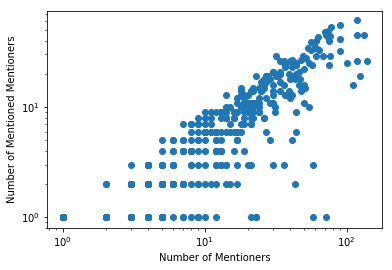

In [111]:
plt.scatter(politicians_mentioners['indegree'], politicians_mentioners['degree'])
plt.xlabel('Number of Mentioners')
plt.ylabel('Number of Mentioned Mentioners')
plt.xscale('log')
plt.yscale('log')

Plot the hidden network:

In [112]:
G_mentioning_giant = max(nx.connected_component_subgraphs(G_mentioning), key=len)

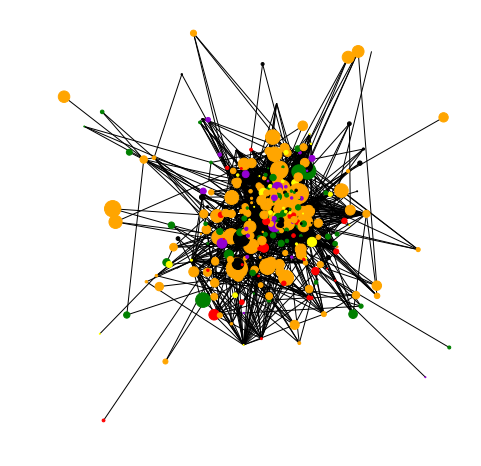

In [113]:
pos_mentioning_giant = nx.spring_layout(D_mentioning, k=0.1, iterations=200)
plt.figure(figsize=(6, 6))
nx.draw(G_mentioning_giant, pos=pos_mentioning_giant, node_size=mentioning_inweight, node_color=politicians_color_mentioning)

Some basic graph statistics:

In [114]:
n = nx.number_of_nodes(G_mentioning_giant)
print('Number of nodes:', n)
m = nx.number_of_edges(G_mentioning_giant)
print('Number of edges:', m)
d = nx.density(G_mentioning_giant)
print('Density:', d)
print('Average degree:', np.mean(mentioning_degree))
print('Degree correlation:', nx.degree_assortativity_coefficient(G_mentioning_giant))
c = np.mean(list(nx.clustering(G_mentioning_giant).values()))
print('Average clustering coefficient:', c)
l = nx.average_shortest_path_length(G_mentioning_giant)
print('Average shortest path length:', l)
print('Diameter:', nx.diameter(G_mentioning_giant))

Number of nodes: 385
Number of edges: 1891
Density: 0.025581709956709955
Average degree: 5.18467852257
Degree correlation: 0.0939595643765
Average clustering coefficient: 0.270759634076
Average shortest path length: 3.2077516233766232
Diameter: 8


<a href=''>Small-world networks</a> are another paradigmatic class of graphs in network science. A network is a small world if it has two properties at the same time. First, it has the property of highly ordered networks that a node's neighbors are strongly connected among themselves (high average clustering coefficient $c$). Second, it has the property of highly disordered networks that nodes have low degrees of seperation (low average shortest path length $l$).

The small-world property is important because it quantifies the co-presence of two central characteristics of mature social systems. The small-world coefficient is obtained by comparing $c$ and $l$ to the corresponding scores $c_{\mathrm{random}}$ and $l_{\mathrm{random}}$ of simulated random graphs and taking the ratio:

In [115]:
c_rand = []
l_rand = []
for i in range(1, 10):
    G_rand = nx.erdos_renyi_graph(n, d)
    G_rand_giant = max(nx.connected_component_subgraphs(G_rand), key=len)
    c_rand.append(np.mean(list(nx.clustering(G_rand).values())))
    l_rand.append(nx.average_shortest_path_length(G_rand_giant))
c_rand = np.mean(c_rand)
l_rand = np.mean(l_rand)

In [116]:
print('Observed average clustering coefficient:', round(c, 2))
print('Expected average clustering coefficient:', round(c_rand, 2))
print('Observed average shortest path length:', round(l, 2))
print('Expected average shortest path length:', round(l_rand, 2))
print('Small-world coefficient:', int(round((c/c_rand)/(l/l_rand), 0)))

Observed average clustering coefficient: 0.27
Expected average clustering coefficient: 0.03
Observed average shortest path length: 3.21
Expected average shortest path length: 2.85
Small-world coefficient: 9
